In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# we're setting some options for nicer printing here
np.set_printoptions(suppress=True, precision=4)

data = pd.read_csv("boston_house_prices.csv")
X = data.drop("MEDV", axis=1)
y = data.MEDV.values

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

(379, 13)


/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app
/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


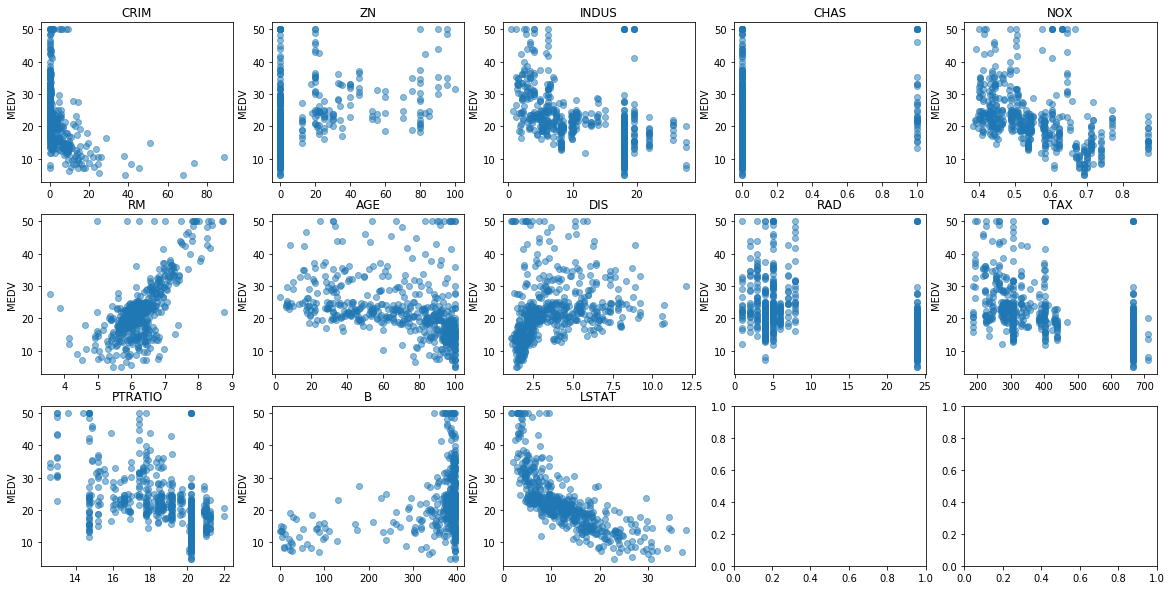

In [3]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for column, ax in zip(X.columns, axes.ravel()):
    ax.plot(X[column], y, 'o', alpha=.5)
    ax.set_title(column)
    ax.set_ylabel("MEDV")

Really Simple API
-------------------
0) Import your model class

In [3]:
from sklearn.linear_model import LinearRegression

1) Instantiate an object and set the parameters

In [4]:
lr = LinearRegression()

2) Fit the model

In [5]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

3) Apply / evaluate

In [7]:
print(lr.predict(X_train_scaled)[:10])
print(y_train[:10])

[17.8591 27.0898 17.3407 23.3916 30.7329 19.5625 13.0738 13.3285 18.6641
 24.0289]
[12.1 22.3 17.5 21.2 34.7 27.5 13.4 17.2 22.6 33. ]


In [8]:
lr.score(X_train_scaled, y_train)

0.7371537848928089

In [9]:
lr.score(X_test_scaled, y_test)

0.741214018821567

And again
---------

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
rf = RandomForestRegressor(n_estimators=50)

In [12]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [13]:
rf.score(X_train, y_train)

0.9803733007763938

In [14]:
rf.score(X_test, y_test)

0.8838401149457001

# Exercises
Load the adult dataset from the last notebook, apply dummy encoding, and split into training and test set.
Then train a LogisticRegression classification model (``from sklearn.linear_model``) on the training data and evaluate on the test data.

You can also try ``RandomForestClassifier``. Using only the subset of the columns we used before will make training quicker.

In [ ]:
# Try to solve it yourself. You can get a solution by uncommenting the line below.
# %load solutions/train_adult.py